In [1]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

In [2]:
print(x_train.shape, y_train.shape)
print(y_train)

print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


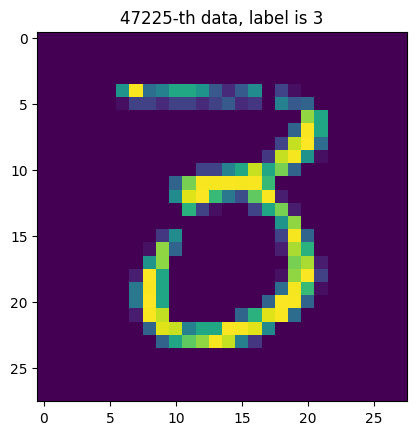

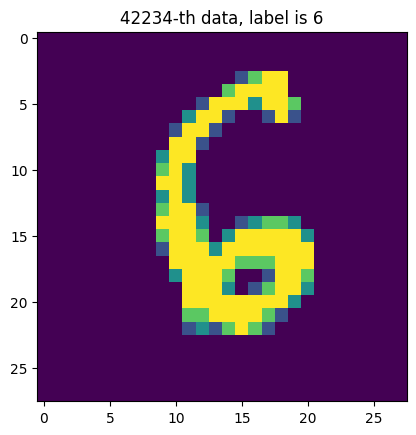

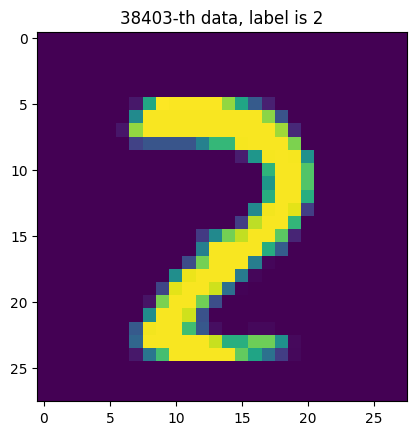

In [3]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3
random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' %(idx, label))

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3,
                                                  random_state= 777)
print(f'훈련데이터{x_train.shape} 레이블 {y_train.shape}')
print(f'검증데이터{x_val.shape} 레이블 {y_val.shape}')

훈련데이터(42000, 28, 28) 레이블 (42000,)
검증데이터(18000, 28, 28) 레이블 (18000,)


In [5]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28)))/255
x_val = (x_val.reshape((num_x_val, 28 * 28)))/255
x_test = (x_test.reshape((num_x_test, 28 * 28)))/255

print(x_train.shape)

(42000, 784)


In [22]:
len(x_train[0])

784

In [24]:
x_train[0]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.098, 0.494,
       0.816, 0.996, 0.886, 0.047, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.059, 0.827,
       0.996, 0.992,

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
len(y_train)

42000

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [8]:
def softmax(arr):
  m = np.max(arr)
  arr = arr - m
  arr = np.exp(arr)
  return arr / np.sum(arr)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision = 3)
print(f'sigmoid {sigmoid(case_1)}, softmax{softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax{softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax[0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax[0.61  0.224 0.166]


In [9]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [26]:
print(x_train.shape)
print(y_train.shape)

(42000, 784)
(42000, 10, 2)


In [10]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 5s 10ms/step - loss: 0.5018 - acc: 0.8593 - val_loss: 0.2471 - val_acc: 0.9300
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2086 - acc: 0.9404 - val_loss: 0.1920 - val_acc: 0.9463
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1605 - acc: 0.9534 - val_loss: 0.1717 - val_acc: 0.9493
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1315 - acc: 0.9616 - val_loss: 0.1453 - val_acc: 0.9583
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1136 - acc: 0.9661 - val_loss: 0.1327 - val_acc: 0.9620
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.0965 - acc: 0.9713 - val_loss: 0.1274 - val_acc: 0.9629
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.0831 - acc: 0.9749 - val_loss: 0.1208 - val_acc: 0.9643
Epoch 8/30
329/329 [==============================] - 2s 7ms/step - loss: 0

In [11]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

<Axes: >

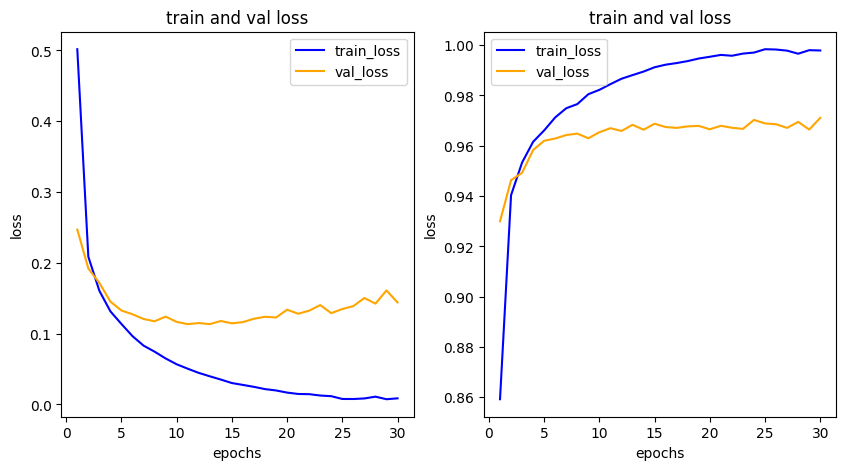

In [18]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()


In [25]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1382 - acc: 0.9723


[0.13816174864768982, 0.9722999930381775]

In [29]:
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision = 7)
print(f'각 클래스에 속할 확률 : \n{results [0]}')

313/313 [==============================] - 1s 4ms/step
(10000, 10)
각 클래스에 속할 확률 : 
[2.1723226e-11 4.8780907e-13 9.6956103e-11 4.0659449e-09 7.8911417e-18
 9.7888113e-12 5.0447768e-25 9.9999994e-01 7.3310325e-12 2.8779162e-10]


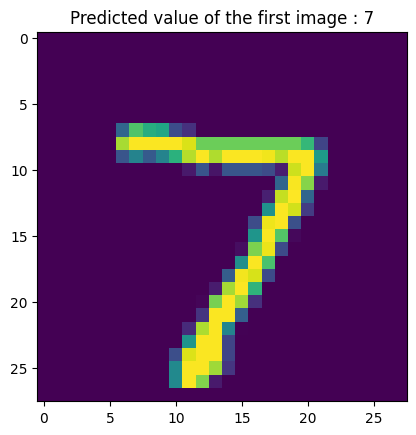

In [31]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1)
plt.imshow(x_test[0].reshape(28,28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]))
plt.show()

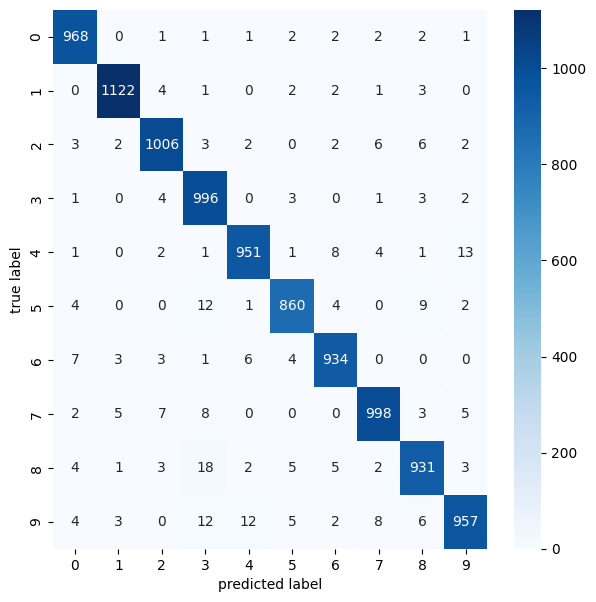

In [32]:
#모델 평가 -1 혼동행렬

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [41]:
#모델평가방법 -2 분류보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

# Precision(정밀도): 예측한 클래스 중 실제로 해당 클래스인 데이터의 비율입니다.
# Recall(재현율): 실제 클래스 중 예측한 클래스와 일치한 데이터의 비율입니다.
# F1-score: Precision과 Recall의 조화평균입니다.
# Support: 각 클래스의 실제 데이터 수입니다.


               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [42]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


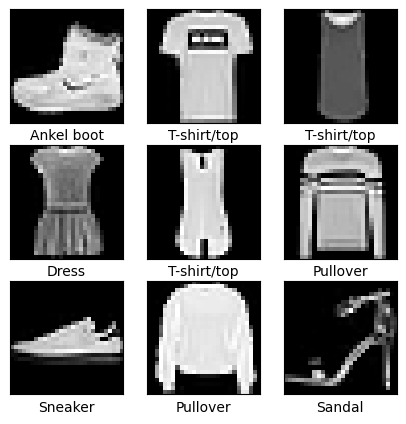

In [44]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = 'gray')
  plt.xlabel(class_names[y_train[i]])

plt.show()

In [45]:
x_train = x_train / 255
x_test = x_test / 255

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state=777)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

first_model.add(Flatten(input_shape=(28, 28)))
first_model.add(Dense(64, activation = 'relu'))
first_model.add(Dense(32, activation = 'relu'))
first_model.add(Dense(10, activation = 'softmax'))


In [52]:
first_model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics=['acc'])

first_history = first_model.fit(x_train, y_train, batch_size = 128, epochs=30, validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 4s 8ms/step - loss: 0.6866 - acc: 0.7662 - val_loss: 0.4649 - val_acc: 0.8398
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4482 - acc: 0.8427 - val_loss: 0.4188 - val_acc: 0.8538
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4052 - acc: 0.8573 - val_loss: 0.4153 - val_acc: 0.8537
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3824 - acc: 0.8644 - val_loss: 0.3884 - val_acc: 0.8597
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3537 - acc: 0.8747 - val_loss: 0.3721 - val_acc: 0.8702
Epoch 6/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3461 - acc: 0.8748 - val_loss: 0.3802 - val_acc: 0.8653
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3289 - acc: 0.8808 - val_loss: 0.3567 - val_acc: 0.8724
Epoch 8/30
329/329 [==============================] - 2s 5ms/step - loss: 0.

In [53]:
second_model = Sequential()

second_model.add(Flatten(input_shape=(28, 28)))
second_model.add(Dense(128, activation = 'relu'))
second_model.add(Dense(64, activation = 'relu'))
second_model.add(Dense(32, activation = 'relu'))
second_model.add(Dense(10, activation = 'softmax'))

second_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',metrics=['acc'])
second_history = second_model.fit(x_train, y_train, batch_size = 128, epochs=30, validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 4s 10ms/step - loss: 0.6227 - acc: 0.7827 - val_loss: 0.4400 - val_acc: 0.8487
Epoch 2/30
329/329 [==============================] - 3s 9ms/step - loss: 0.4250 - acc: 0.8477 - val_loss: 0.4024 - val_acc: 0.8568
Epoch 3/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3806 - acc: 0.8617 - val_loss: 0.3742 - val_acc: 0.8652
Epoch 4/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3410 - acc: 0.8752 - val_loss: 0.3485 - val_acc: 0.8742
Epoch 5/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3256 - acc: 0.8804 - val_loss: 0.3464 - val_acc: 0.8784
Epoch 6/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3079 - acc: 0.8863 - val_loss: 0.3354 - val_acc: 0.8828
Epoch 7/30
329/329 [==============================] - 3s 9ms/step - loss: 0.2952 - acc: 0.8893 - val_loss: 0.3342 - val_acc: 0.8792
Epoch 8/30
329/329 [==============================] - 2s 7ms/step - loss: 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
  his_dict_1 = history_1.history
  his_dict_2 = history_2.history
  keys = list(his_dict_1.keys())

  epochs = range(1, epochs)
  fig = plt.figure(figsize = (10, 10))
  ax = fig.add_subplot(1,1,1)

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.thick_params(labelcolor = 'w', top=False, bottom = False, left = False, right = False)

  for i in range(len(his_dict_1)):
    temp_ax = fig.add_subplot(2,2,i+1)
    temp = keys[i%2]
    val_temp = keys[(i+2)%2 + 2]
    temp_history = his_dict_1 if i < 2 else his_dict_2